In [5]:
# Gerekli kütüphaneleri içe aktaralım
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [7]:
# 1. Veri Setini Yükleme
# ARFF dosyasını okuyalım
data, meta = arff.loadarff('Training Dataset.arff')

# Pandas DataFrame'e dönüştürelim
df = pd.DataFrame(data)

# Byte tipindeki sütunları stringe çevirelim
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

# Veri setinin ilk birkaç satırını görelim
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [9]:
# 2. Veri Keşfi ve Ön İşleme
# Veri seti boyutlarını görelim
print(f"Veri seti boyutu: {df.shape}")

# Sütun isimlerini görelim
print("\nSütun isimleri:")
for col in df.columns:
    print(f"- {col}")

# Veri tiplerine bakalım
print("\nVeri tipleri:")
print(df.dtypes)



Veri seti boyutu: (11055, 31)

Sütun isimleri:
- having_IP_Address
- URL_Length
- Shortining_Service
- having_At_Symbol
- double_slash_redirecting
- Prefix_Suffix
- having_Sub_Domain
- SSLfinal_State
- Domain_registeration_length
- Favicon
- port
- HTTPS_token
- Request_URL
- URL_of_Anchor
- Links_in_tags
- SFH
- Submitting_to_email
- Abnormal_URL
- Redirect
- on_mouseover
- RightClick
- popUpWidnow
- Iframe
- age_of_domain
- DNSRecord
- web_traffic
- Page_Rank
- Google_Index
- Links_pointing_to_page
- Statistical_report
- Result

Veri tipleri:
having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    

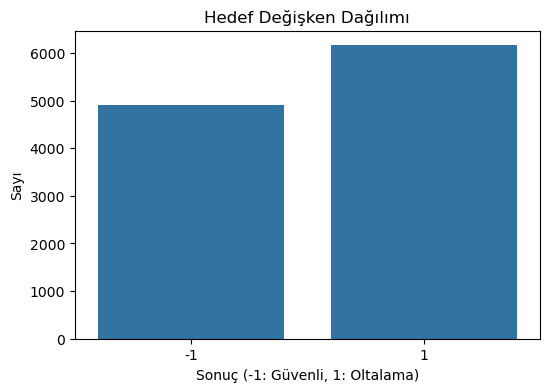

Sonuç dağılımı (%):
Result
1     55.694256
-1    44.305744
Name: proportion, dtype: float64


In [11]:
# Hedef değişkenin dağılımını görelim (Result sütunu)
plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=df)
plt.title('Hedef Değişken Dağılımı')
plt.xlabel('Sonuç (-1: Güvenli, 1: Oltalama)')
plt.ylabel('Sayı')
plt.show()

# Yüzdelik dağılımı görelim
result_counts = df['Result'].value_counts(normalize=True) * 100
print(f"Sonuç dağılımı (%):\n{result_counts}")

In [13]:
# 3. Veriyi Eğitim ve Test Setlerine Ayırma
# Bağımsız değişkenler (X) ve hedef değişkeni (y) ayıralım
X = df.drop('Result', axis=1)
y = df['Result']

# Veriyi sayısal formata dönüştürelim
X = X.astype(float)

# Veriyi %70 eğitim, %30 test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Eğitim seti boyutu: (7738, 30)
Test seti boyutu: (3317, 30)



Karar Ağacı (Gini) modeli eğitiliyor...
Doğruluk Oranı: 0.9563

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.95      0.94      0.95      1428
           1       0.96      0.97      0.96      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.95      0.96      3317
weighted avg       0.96      0.96      0.96      3317



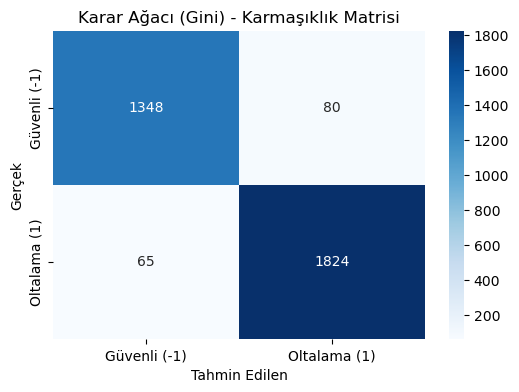


Karar Ağacı (Entropy) modeli eğitiliyor...
Doğruluk Oranı: 0.9614

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1428
           1       0.96      0.97      0.97      1889

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



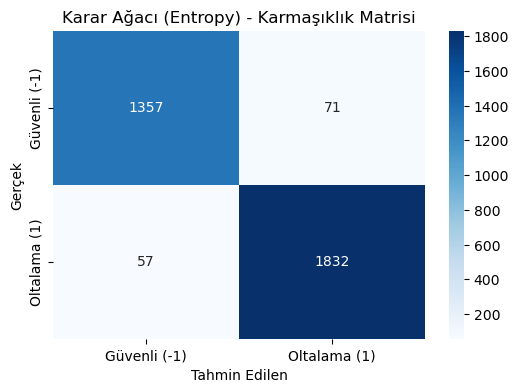


Rastgele Orman modeli eğitiliyor...
Doğruluk Oranı: 0.9668

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1428
           1       0.96      0.98      0.97      1889

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317



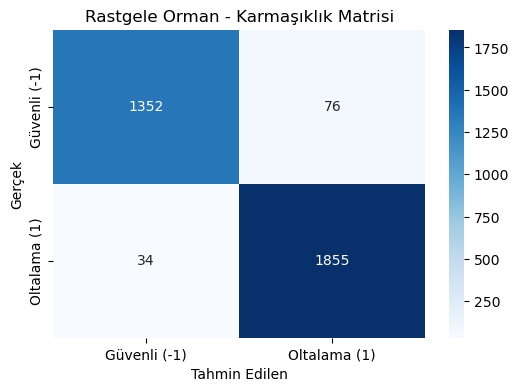


SVM modeli eğitiliyor...
Doğruluk Oranı: 0.9424

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1428
           1       0.94      0.96      0.95      1889

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



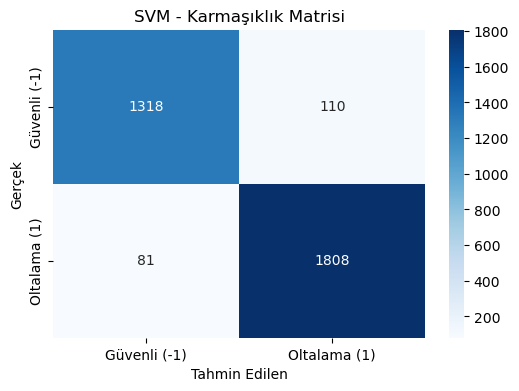


K-En Yakın Komşu modeli eğitiliyor...
Doğruluk Oranı: 0.9340

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.93      0.92      0.92      1428
           1       0.94      0.95      0.94      1889

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



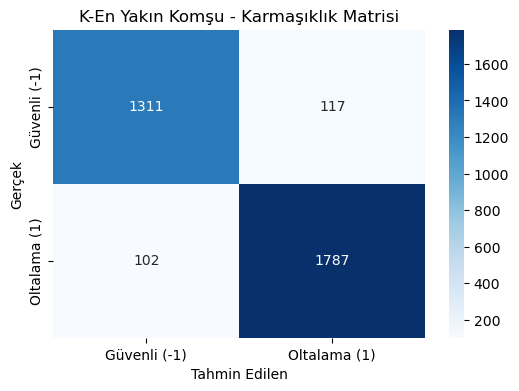


Yapay Sinir Ağı modeli eğitiliyor...
Doğruluk Oranı: 0.9674

Sınıflandırma Raporu:
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1428
           1       0.96      0.98      0.97      1889

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317



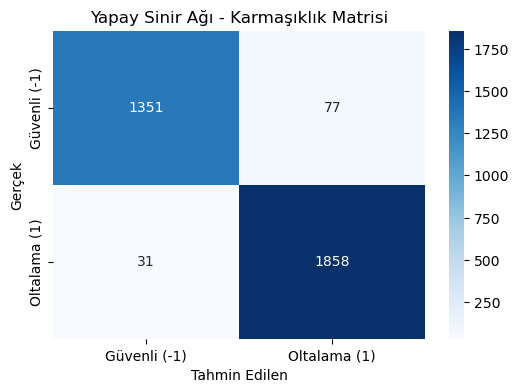

In [15]:
# 4. Farklı Makine Öğrenmesi Modellerini Eğitme ve Değerlendirme
# Farklı modelleri tanımlayalım
models = {
    'Karar Ağacı (Gini)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'Karar Ağacı (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Rastgele Orman': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'K-En Yakın Komşu': KNeighborsClassifier(n_neighbors=5),
    'Yapay Sinir Ağı': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', 
                                    solver='adam', random_state=42)
}

# Sonuçları saklamak için bir sözlük oluşturalım
results = {}

# Her modeli eğitip değerlendirelim
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahmin yapalım
    y_pred = model.predict(X_test)
    
    # Doğruluk oranını hesaplayalım
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Doğruluk Oranı: {accuracy:.4f}")
    
    # Sınıflandırma raporunu yazdıralım
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))
    
    # Karmaşıklık matrisini çizdirelim
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Güvenli (-1)', 'Oltalama (1)'],
                yticklabels=['Güvenli (-1)', 'Oltalama (1)'])
    plt.title(f'{name} - Karmaşıklık Matrisi')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

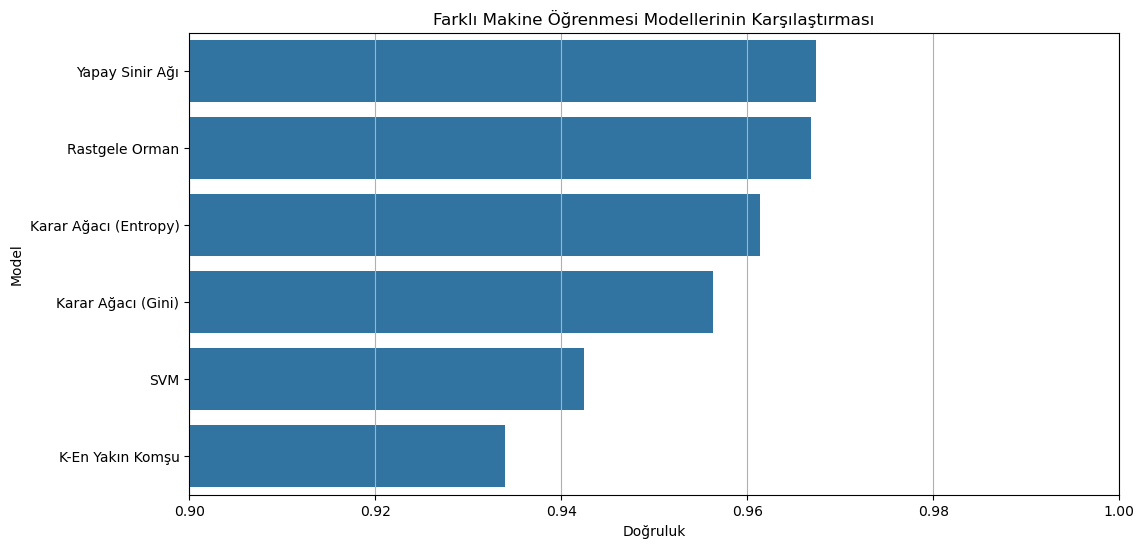


En iyi performans gösteren model: Yapay Sinir Ağı
Doğruluk oranı: 0.9674


In [17]:
# 5. Model Sonuçlarını Karşılaştırma
# Sonuçları görselleştirelim
plt.figure(figsize=(12, 6))
models_df = pd.DataFrame({'Model': list(results.keys()), 'Doğruluk': list(results.values())})
models_df = models_df.sort_values('Doğruluk', ascending=False)

sns.barplot(x='Doğruluk', y='Model', data=models_df)
plt.title('Farklı Makine Öğrenmesi Modellerinin Karşılaştırması')
plt.xlim(0.9, 1.0)  # Doğruluk değerleri genellikle yüksek olduğundan grafiği daha iyi görmek için
plt.grid(axis='x')
plt.show()

# En iyi modeli bulalım
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"\nEn iyi performans gösteren model: {best_model_name}")
print(f"Doğruluk oranı: {best_accuracy:.4f}")

In [37]:
# 6. En İyi Modelin Öznitelik Önemlerini İnceleme
# En iyi model ağaç tabanlı ise öznitelik önemlerini görelim
tree_based_models = ['Karar Ağacı (Gini)', 'Karar Ağacı (Entropy)', 'Rastgele Orman','Yapay Sinir Ağı']

if best_model_name in tree_based_models:
    best_model = models[best_model_name]
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = best_model.feature_importances_
        
        # Öznitelik önemlerini sıralayalım
        feature_importance_df = pd.DataFrame({
            'Öznitelik': X.columns,
            'Önem': feature_importances
        })
        feature_importance_df = feature_importance_df.sort_values('Önem', ascending=False)
        
        # En önemli 15 özniteliği gösterelim
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Önem', y='Öznitelik', data=feature_importance_df.head(15))
        plt.title(f'{best_model_name} - En Önemli 15 Öznitelik')
        plt.tight_layout()
        plt.show()
        
        print("\nEn önemli 5 öznitelik:")
        for idx, row in feature_importance_df.head(5).iterrows():
            print(f"{row['Öznitelik']}: {row['Önem']:.4f}")
    else:
        print(f"{best_model_name} modeli feature_importances_ özelliğine sahip değil.")


Yapay Sinir Ağı modeli feature_importances_ özelliğine sahip değil.


In [40]:
# 7. Çapraz Doğrulama ile En İyi Modelin Performansını Değerlendirme
# En iyi modeli seçelim
best_model = models[best_model_name]

# 5 katlı çapraz doğrulama uygulayalım
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"\n{best_model_name} - 5 Katlı Çapraz Doğrulama Sonuçları:")
print(f"Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"Standart Sapma: {cv_scores.std():.4f}")
print(f"Doğruluk Aralığı: [{cv_scores.min():.4f} - {cv_scores.max():.4f}]")


Yapay Sinir Ağı - 5 Katlı Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.9645
Standart Sapma: 0.0168
Doğruluk Aralığı: [0.9340 - 0.9787]


In [42]:
# 8. Sonuçların Özeti
# Tüm modellerin sonuçlarını tablo halinde gösterelim
result_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Doğruluk': list(results.values())
}).sort_values('Doğruluk', ascending=False)

print("Tüm Modellerin Doğruluk Sonuçları:\n")
print(result_df)

print(f"\nEn iyi model {best_model_name} ile %{best_accuracy*100:.2f} doğruluk oranı elde edildi.")


Tüm Modellerin Doğruluk Sonuçları:

                   Model  Doğruluk
5        Yapay Sinir Ağı  0.967440
2         Rastgele Orman  0.966838
1  Karar Ağacı (Entropy)  0.961411
0     Karar Ağacı (Gini)  0.956286
3                    SVM  0.942418
4       K-En Yakın Komşu  0.933976

En iyi model Yapay Sinir Ağı ile %96.74 doğruluk oranı elde edildi.
